DSCI 100 008 Group 8 Project Proposal

INTRODUCTION

In the face of increasing concerns over climate change, regions like British Columbia are experiencing the direct and immediate consequences of these environmental shifts. One of the most pressing issues is the escalating frequency and intensity of forest fires. Forest Fire Weather Index (FWI) systems play a pivotal role in monitoring and predicting these fires, with local environmental conditions playing a critical role. 
In this project, we are trying to predict the Initial Spread Index (ISI) by month, which ranges from 0.00 to 56.0 in the FWI system, as it describes the rate of fire spread and indicates the difficulty to control the fire - influencing control measures and strategies. This will be based on environmental factors such as rain, relative humidity, wind,, and fine fuel moisture code.
To do so, we are using the data set: forest_fires, sourced from http://www.dsi.uminho.pt/~pcortez/forestfires and containing quantified meteorological information from forest fires in the northeast region of Portugal. 


In [1]:
#Loading Packages
library(repr)
library(tidyverse)
library(tidymodels)
library(dplyr)

set.seed(999)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.2     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.1
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.3     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.2     ✔ rsample      1.1.1
✔ dials        1.1.0     ✔ tune         1.0.1
✔ infer        1.0.4     ✔ workflows    1.1.2
✔ modeldata    1.0.1     ✔ workflowsets 1.0.0
✔ parsnip      1.0.3     ✔ yardstick    1.1.0
✔ recipes      1.0.4     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks read

METHOD

Given that we aim to predict a numerical value, we will be performing a regression analysis. The columns we will use are RH, wind, FFMC, temp, and month as we expect these environmental factors to influence the initial spread index value the most. All other columns will be disregarded as they do not aid our predictions. Then, we will create hypothetical environmental observations for a given forest fire and predict the ISI based on our selected predictors. In order to visualize the data, we will create multiple scatter plots that compare single factors to the ISI index. A second layer will be added to visualize the trends, and precision of our model predicting the ISI index. 


PRELIMINARY EXPLORATORY DATA ANALYSIS

In [2]:
ff_raw <- read_csv("https://raw.githubusercontent.com/MingTxm/DSCI100_GroupProject/main/forestfires.csv")
glimpse(ff_raw)

Rows: 517 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): month, day
dbl (11): X, Y, FFMC, DMC, DC, ISI, temp, RH, wind, rain, area

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 517
Columns: 13
$ X     <dbl> 7, 7, 7, 8, 8, 8, 8, 8, 8, 7, 7, 7, 6, 6, 6, 6, 5, 8, 6, 6, 6, 5…
$ Y     <dbl> 5, 4, 4, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4…
$ month <chr> "mar", "oct", "oct", "mar", "mar", "aug", "aug", "aug", "sep", "…
$ day   <chr> "fri", "tue", "sat", "fri", "sun", "sun", "mon", "mon", "tue", "…
$ FFMC  <dbl> 86.2, 90.6, 90.6, 91.7, 89.3, 92.3, 92.3, 91.5, 91.0, 92.5, 92.5…
$ DMC   <dbl> 26.2, 35.4, 43.7, 33.3, 51.3, 85.3, 88.9, 145.4, 129.5, 88.0, 88…
$ DC    <dbl> 94.3, 669.1, 686.9, 77.5, 102.2, 488.0, 495.6, 608.2, 692.6, 698…
$ ISI   <dbl> 5.1, 6.7, 6.7, 9.0, 9.6, 14.7, 8.5, 10.7, 7.0, 7.1, 7.1, 22.6, 0…
$ temp  <dbl> 8.2, 18.0, 14.6, 8.3, 11.4, 22.2, 24.1, 8.0, 13.1, 22.8, 17.8, 1…
$ RH    <dbl> 51, 33, 33, 97, 99, 29, 27, 86, 63, 40, 51, 38, 72, 42, 21, 44, …
$ wind  <dbl> 6.7, 0.9, 1.3, 4.0, 1.8, 5.4, 3.1, 2.2, 5.4, 4.0, 7.2, 4.0, 6.7,…
$ rain  <dbl> 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,…
$ area  <dbl> 0, 0

In [3]:
# Filtering unnecessary data
ff <- ff_raw |>
    select(month, ISI, FFMC, RH, temp, wind) |>
    arrange(desc(month))

# Splitting the Data
ff_split <- initial_split(ff, prop = 0.75, strata = ISI)
    ff_train <- training(ff_split)
    ff_test <- testing(ff_split)

ff_train

month,ISI,FFMC,RH,temp,wind
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
sep,6.3,90.3,62,18.2,4.5
sep,6.2,90.1,74,12.9,4.9
sep,6.3,90.3,63,17.8,4.9
sep,4.8,89.7,39,22.8,3.6
sep,3.2,84.4,45,17.9,3.1
sep,3.2,84.4,28,24.2,3.6
sep,4.8,89.7,67,17.8,2.2
sep,6.2,90.1,45,18.3,2.2
sep,6.2,90.1,57,15.4,4.5


In [4]:
# Getting a row count & mean values
ff_count <- ff_train |>
    group_by(month)|>
    summarize(count = n())

ff_mean <- ff_train |>
    group_by(month) |>
    summarize(mean(ISI), mean(RH), mean(FFMC), mean(temp), mean(wind))
    
ff_summary <- bind_cols(ff_count, ff_mean) |>
    select(-month...3) |>
    rename(month = month...1)

ff_summary

New names:
• `month` -> `month...1`
• `month` -> `month...3`


month,count,mean(ISI),mean(RH),mean(FFMC),mean(temp),mean(wind)
<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
apr,6,6.383333,50.66667,86.88333,12.766667,4.766667
aug,136,11.425735,45.60294,92.39853,21.700735,4.155882
dec,7,2.900000,32.85714,85.08571,4.814286,7.914286
feb,14,3.442857,53.85714,82.80000,9.778571,3.250000
jan,2,1.450000,89.00000,50.40000,5.250000,2.000000
jul,26,8.784615,43.23077,91.13462,22.288462,3.446154
jun,13,12.869231,44.38462,88.86154,20.284615,3.992308
mar,37,6.910811,41.62162,89.10541,13.018919,5.032432
may,2,4.600000,67.00000,87.35000,14.650000,4.450000


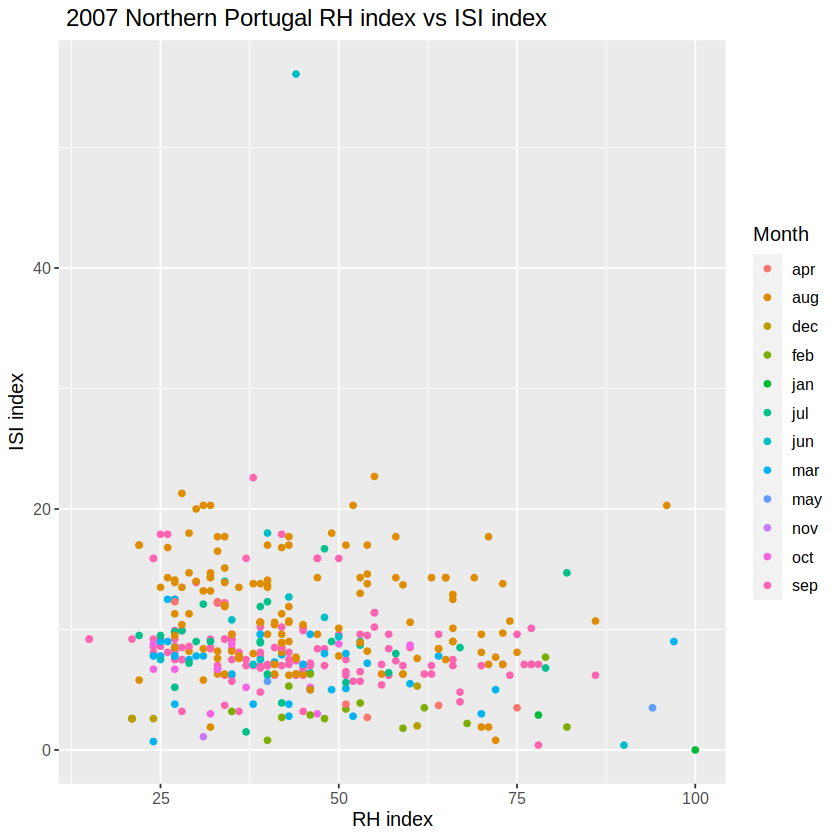

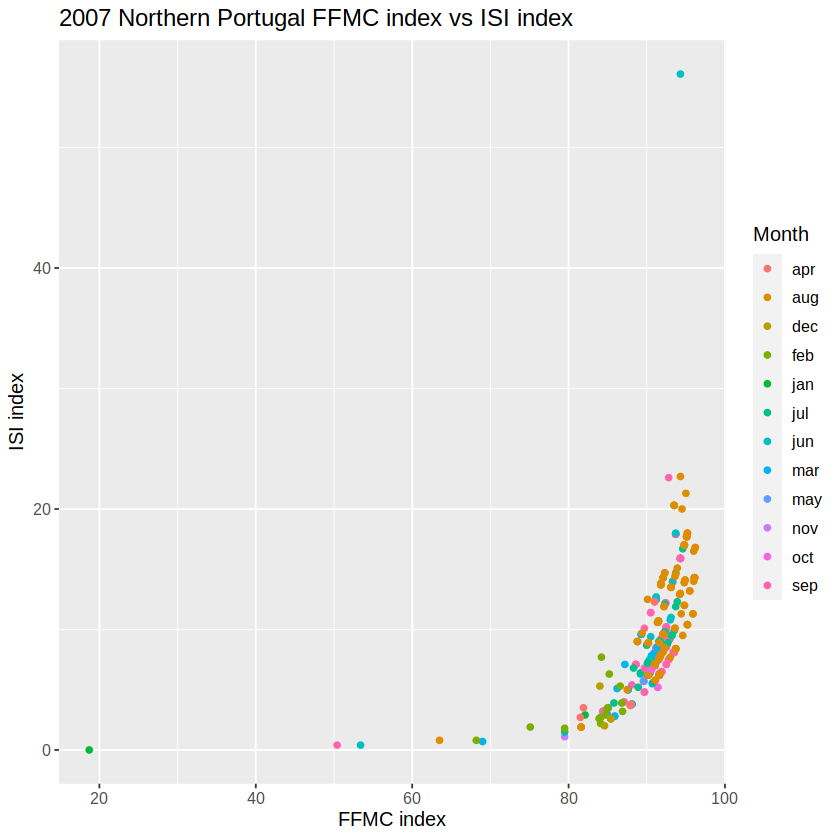

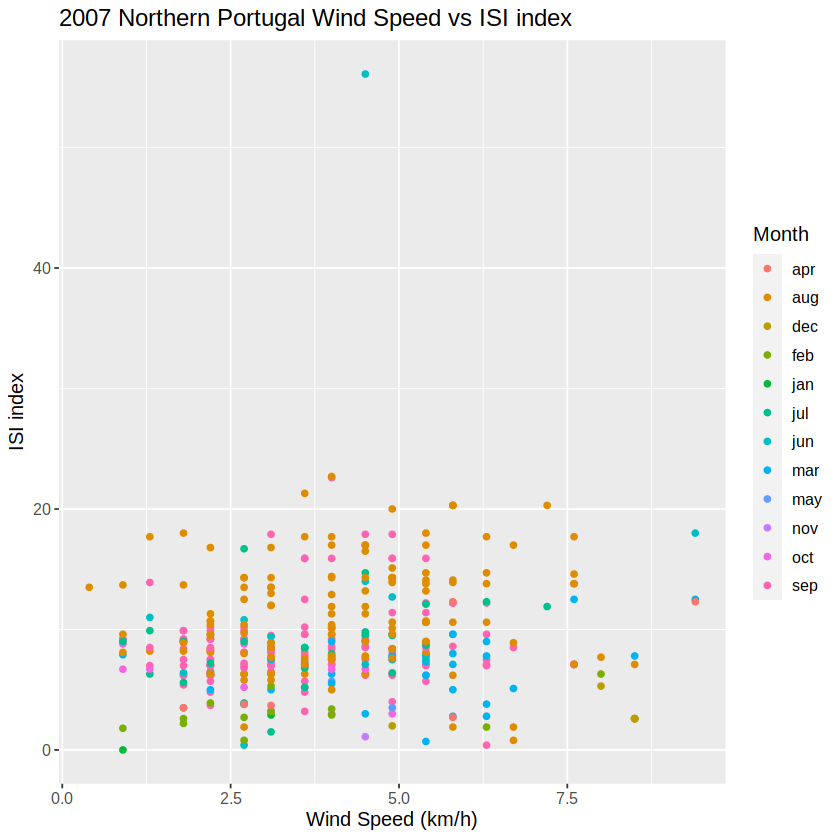

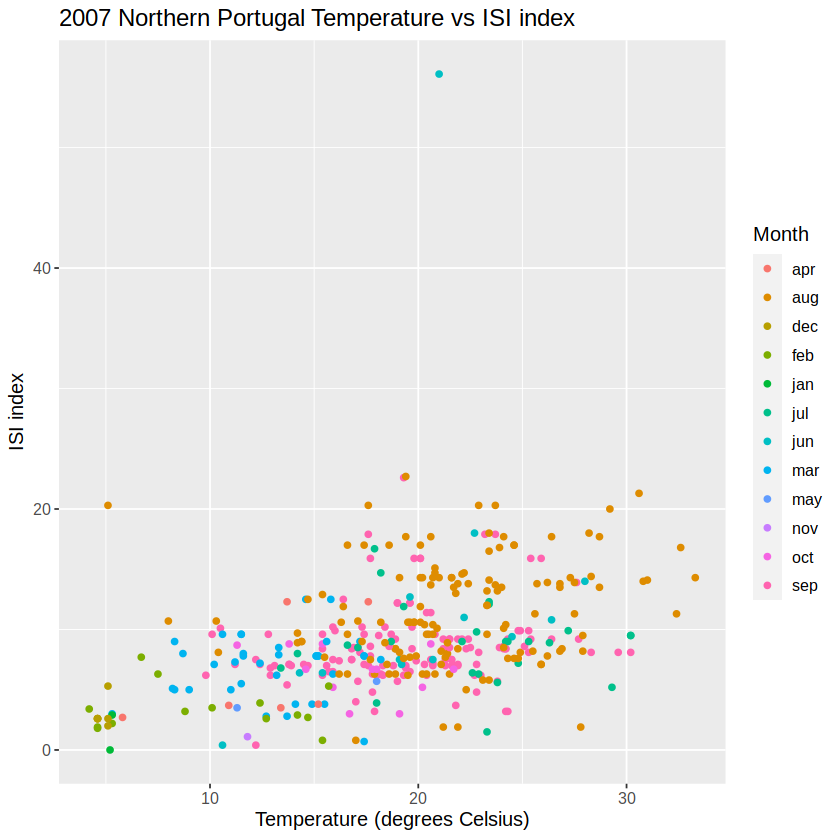

In [5]:
# Plotting the Predictors

ff_plot_RH <- ff_train |>
    ggplot(aes(x = RH, y = ISI, color = month)) +
    geom_point() +
    labs(x = "RH index", y = "ISI index", color = "Month", title = " 2007 Northern Portugal RH index vs ISI index") +
    theme(text = element_text(size = 12))
ff_plot_RH

ff_plot_FFMC <- ff_train |>
    ggplot(aes(x = FFMC, y = ISI, color = month)) +
    geom_point() +
    labs(x = "FFMC index", y = "ISI index", color = "Month", title = "2007 Northern Portugal FFMC index vs ISI index")+
    theme(text = element_text(size = 12))
ff_plot_FFMC

ff_plot_wind <- ff_train |>
    ggplot(aes(x = wind, y = ISI, color = month)) +
    geom_point() +
    labs(x = "Wind Speed (km/h)", y = "ISI index", color = "Month", title = "2007 Northern Portugal Wind Speed vs ISI index")+
    theme(text = element_text(size = 12))
ff_plot_wind

ff_plot_temp <- ff_train |>
    ggplot(aes(x = temp, y = ISI, color = month)) +
    geom_point() +
    labs(x = "Temperature (degrees Celsius)", y = "ISI index", color = "Month", title = "2007 Northern Portugal Temperature vs ISI index")+
    theme(text = element_text(size = 12))
ff_plot_temp

EXPECTED OUTCOMES AND SIGNIFICANCE

By performing a regression analysis, we anticipate finding that ISI predictions will vary across different regions of northeastern Portugal, reflecting the complex interplay of climate, terrain, and vegetation types. These predictions are likely to reveal seasonal patterns, with ISI values higher during dry, hot periods and lower during wetter, cooler seasons. Additionally, we may discover specific geographic areas with consistently high or low ISI values due to local climate and landscape features.
By doing so, we aim to equip policymakers, fire management agencies, and the broader community in areas vulnerable to forest fires with a tool for early detection, risk assessment, and preparedness in the face of the growing threat of forest fires. Overall, this data enables multiple parties to develop proactive measures that could reduce the frequency and severity of wildfires, mitigating economic losses, minimizing ecological damage, and improving public safety.

Through this analysis, there are future questions that can be propose. For instance, we could analyze which environmental factors contribute the greatest to ISI values, or predict the frequency of forest fires given a set of past weather conditions.
